### Import Packages

In [5]:
# Import packages for S3 connection
import pandas as pd
import boto3
import botocore
from io import StringIO

# Import packages for data manipulation
import numpy as np
import matplotlib.pyplot as plt

# Import packages for data visualization
import seaborn as sns


# Import packages for featured engineering
from sklearn.preprocessing import LabelEncoder

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#SVM
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC


# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

### Data Conection to S3

In [6]:
# Import the S3Utils class from s3conn.ipynb
%run s3conn.ipynb

# Set the path to your AWS credentials file
file_path = 'C:/churn/bucketcredentials.csv'

# Create an instance of the S3Utils class
s3_utils = S3Utils(file_path)

# Define your parameters
env = "dev" #  dev, test, staging, prod 
mainsource = "SourceDataSet/bank_data_train.csv"
envraw = f'{env}/raw/bank_data_train.csv'

# Always check the Raw SourceCode is it exists if that it will copy the file to raw on a specific environment
# Send sourcefile to env/raw
s3_utils.check_and_transfer_file(mainsource, envraw)



In [7]:
# Read the raw data from the S3 bucket
input_file_key_data_cleaning = f'{env}/raw/bank_data_train.csv'  #this filename is from Kaggle and for the purpose of identification we are going to use the same filename as our main raw datasources. subfolder are used for distinction of file

# Output file key directory which is also servers as an input for other process
output_file_key_data_cleaning = f'{env}/processed/bank_data_cleaned.csv'

output_file_key_data_visualization = f'{env}/processed/bank_data_visualization.csv'

output_file_key_data_feature_engineering= f'{env}/final/bank_data_feature_eng.csv'

output_file_key_data_X_train = f'{env}/final/model_one/X_train.csv'
output_file_key_data_X_test = f'{env}/final/model_one/X_test.csv'

output_file_key_data_Y_train = f'{env}/final/model_one/Y_train.csv'
output_file_key_data_Y_test = f'{env}/final/model_one/Y_test.csv'

# output_file_key_data_model_one_train = f'{env}/final/model_one/bank_data_train.csv'
# output_file_key_data_model_one_test = f'{env}/final/model_one/bank_data_test.csv'

# output_file_key_data_model_two_train =   f'{env}/final/model_two/bank_data_train.csv'
# output_file_key_data_model_two_test =   f'{env}/final/model_two/bank_data_test.csv'

# output_file_key_data_model_three_train = f'{env}/final/model_three/bank_data_train.csv'
# output_file_key_data_model_three_test = f'{env}/final/model_three/bank_data_test.csv'

### execute notebooks accdly

Nulls in column id: 0
Nulls in column cr_prod_cnt_il: 0
Nulls in column amount_rub_clo_prc: 38323
Nulls in column app_registr_rgn_code: 294640
Nulls in column turnover_dynamic_il_1m: 0
Nulls in column cnt_tran_aut_tendency1m: 278078
Nulls in column sum_tran_aut_tendency1m: 278078
Nulls in column amount_rub_sup_prc: 38323
Nulls in column sum_tran_aut_tendency3m: 244138
Nulls in column clnt_trust_relation: 285769
Nulls in column rest_dynamic_fdep_1m: 0
Nulls in column cnt_tran_aut_tendency3m: 244138
Nulls in column app_marital_status: 286956
Nulls in column rest_dynamic_save_3m: 0
Nulls in column cr_prod_cnt_vcu: 0
Nulls in column rest_avg_cur: 0
Nulls in column cnt_tran_med_tendency1m: 286223
Nulls in column app_kind_of_prop_habitation: 295829
Nulls in column clnt_job_position_type: 310409
Nulls in column amount_rub_nas_prc: 38323
Nulls in column clnt_job_position: 144379
Nulls in column app_driving_license: 297933
Nulls in column trans_count_sup_prc: 38323
Nulls in column app_education

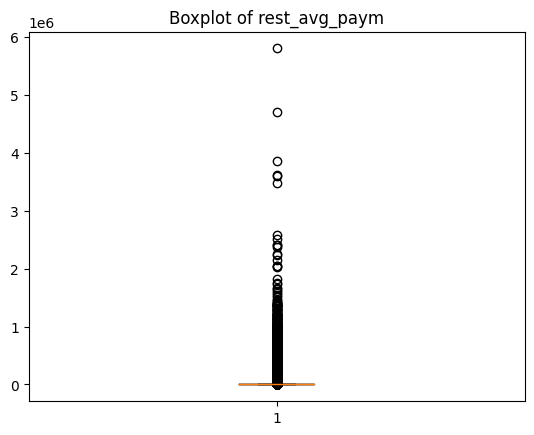

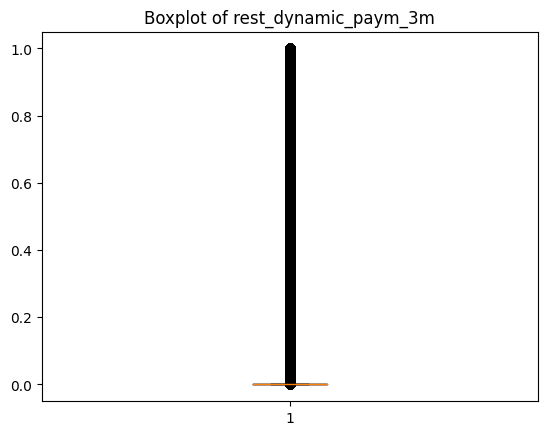

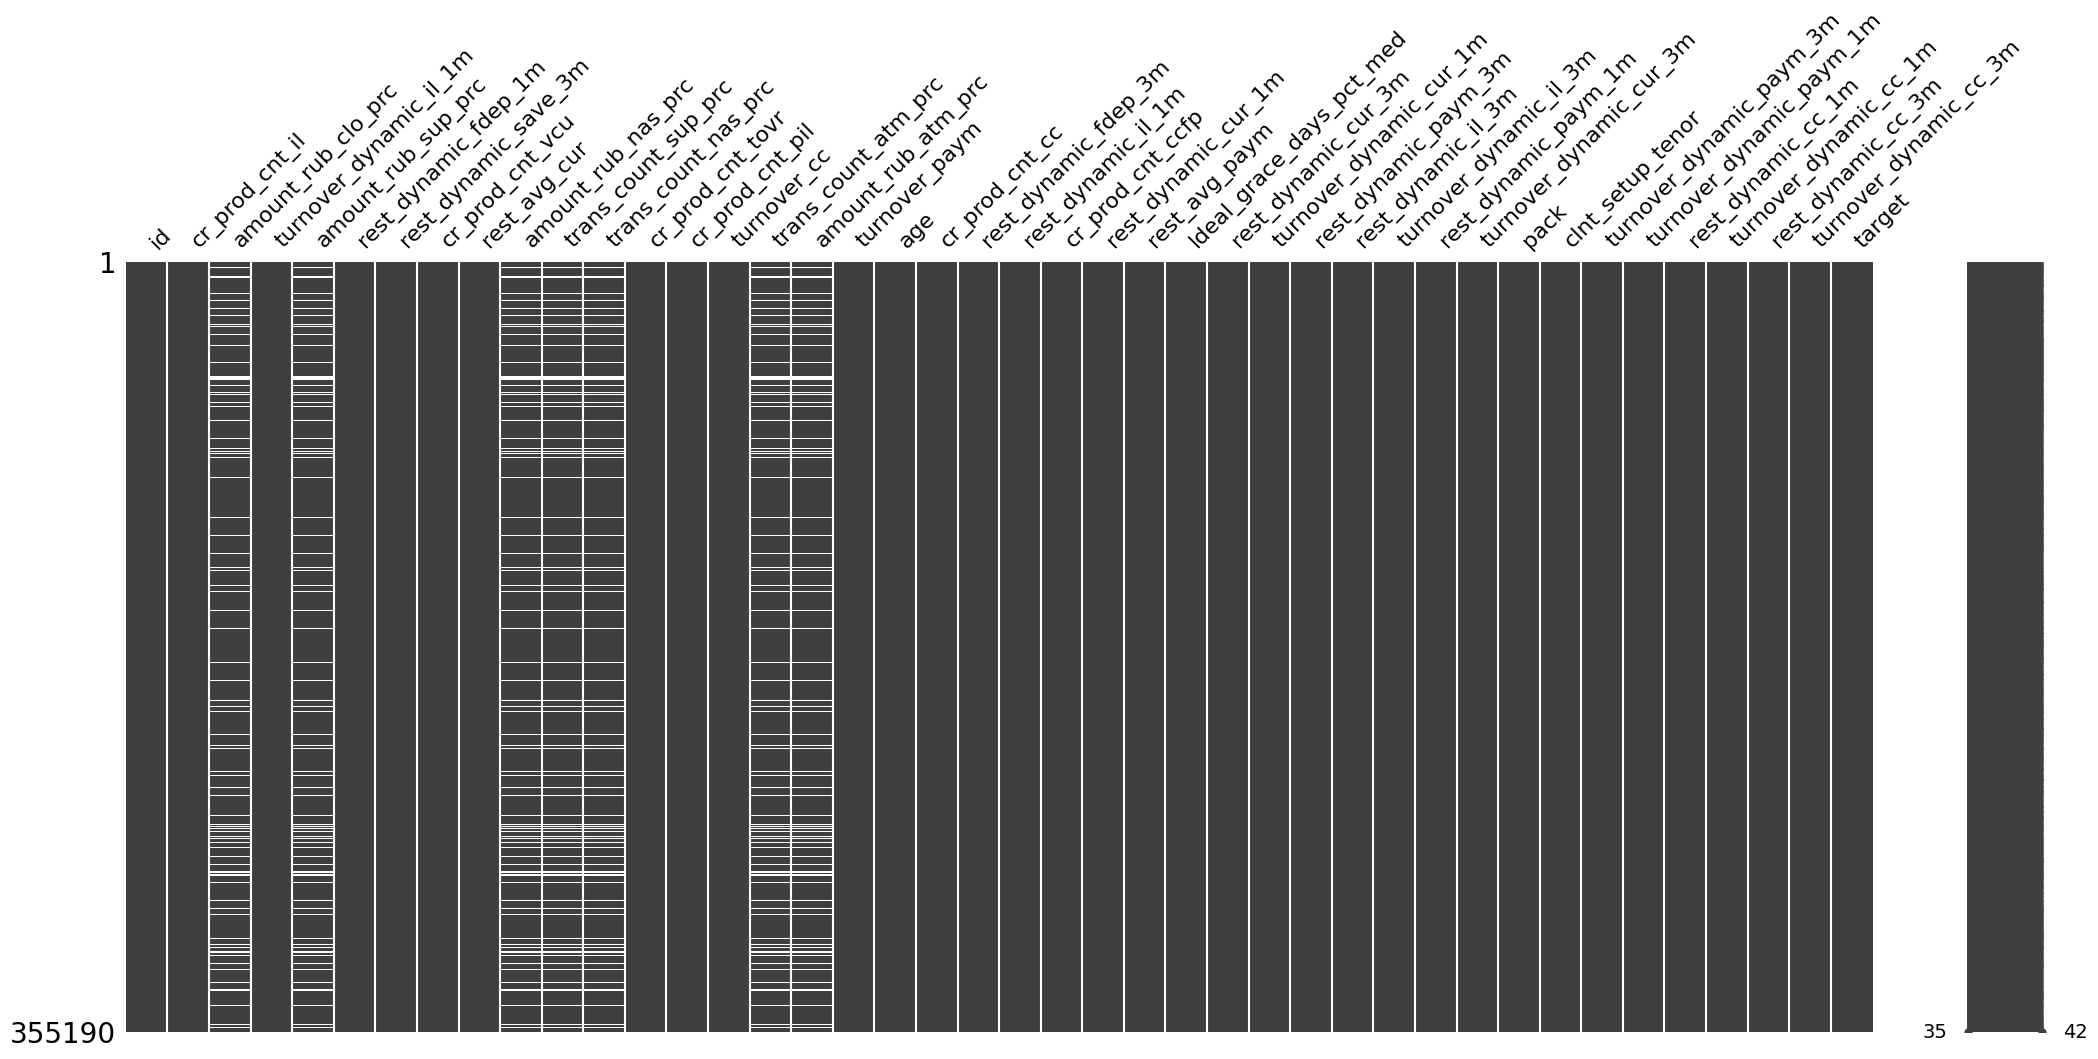

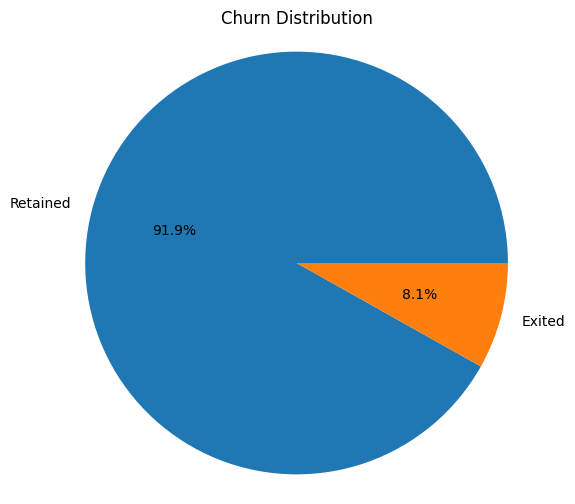

            id  cr_prod_cnt_il  amount_rub_clo_prc  turnover_dynamic_il_1m  \
0       146841               0            0.000000                     0.0   
1       146842               0            0.041033                     0.0   
2       146843               0            0.006915                     0.0   
3       146844               0            0.000000                     0.0   
4       146845               0            0.000000                     0.0   
...        ...             ...                 ...                     ...   
355185  590822               0            0.000000                     0.0   
355186  590823               0            0.000000                     0.0   
355187  590825               0            0.041298                     0.0   
355188  590826               0            0.000000                     0.0   
355189  590828               0            0.000000                     0.0   

        amount_rub_sup_prc  rest_dynamic_fdep_1m  rest_dynamic_

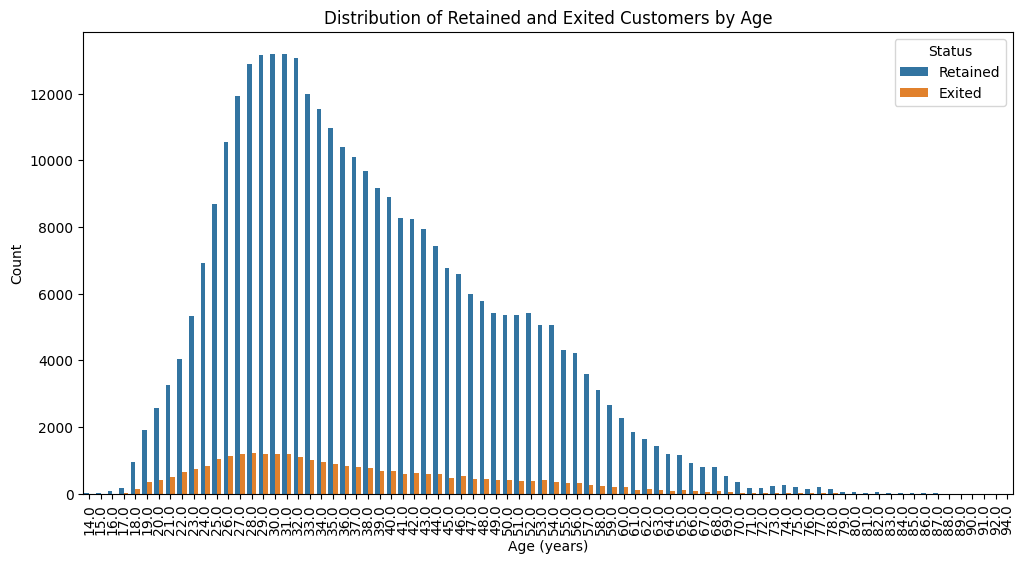

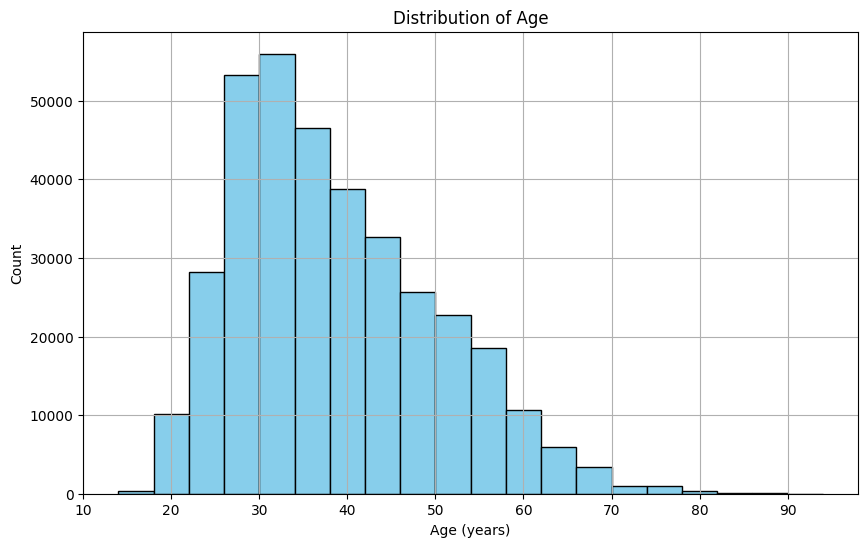

d:\Users\presc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\presc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


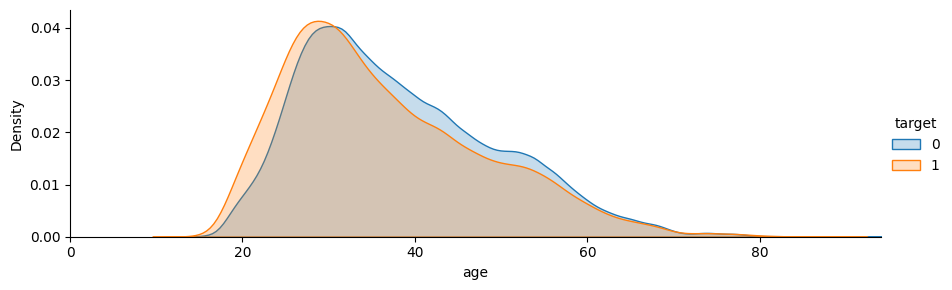

d:\Users\presc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\presc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


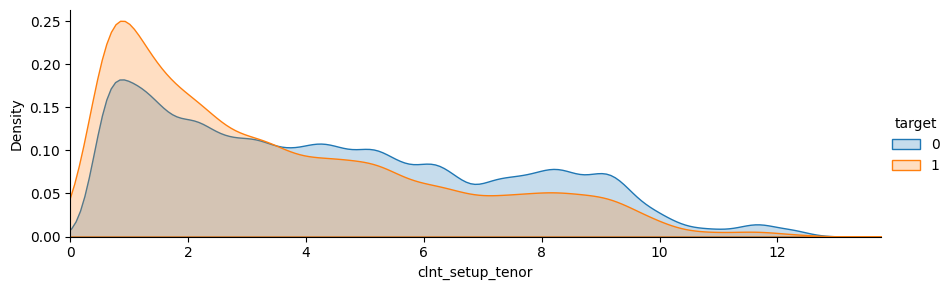

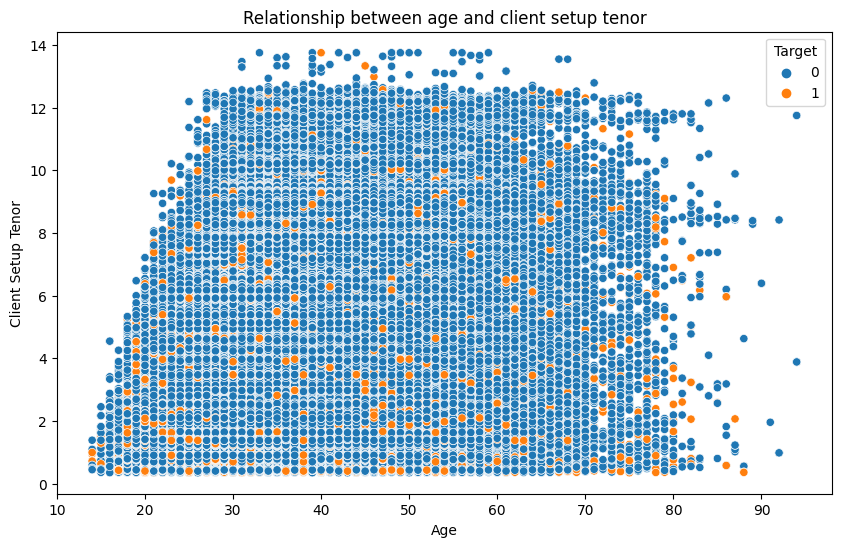

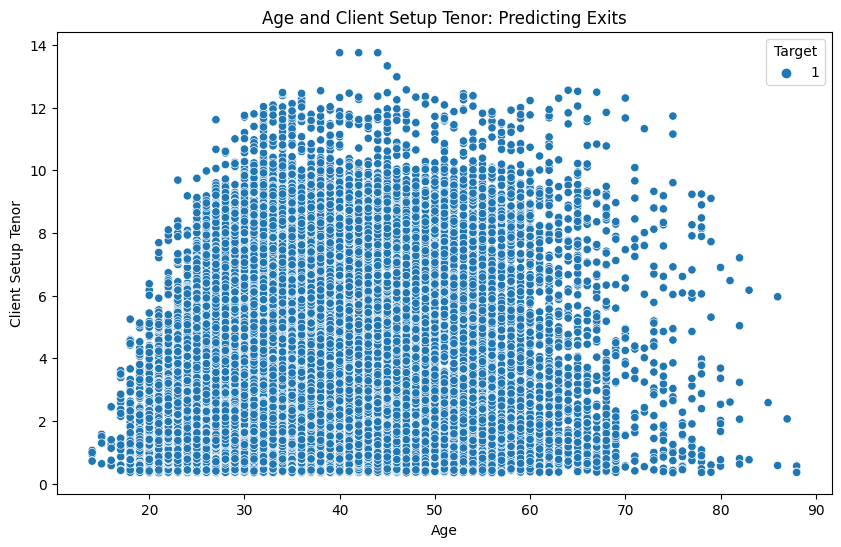

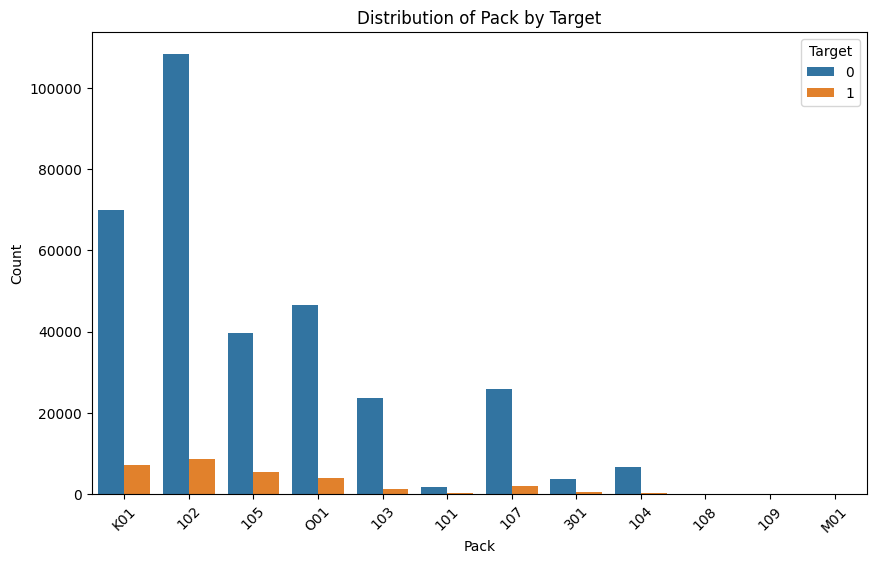

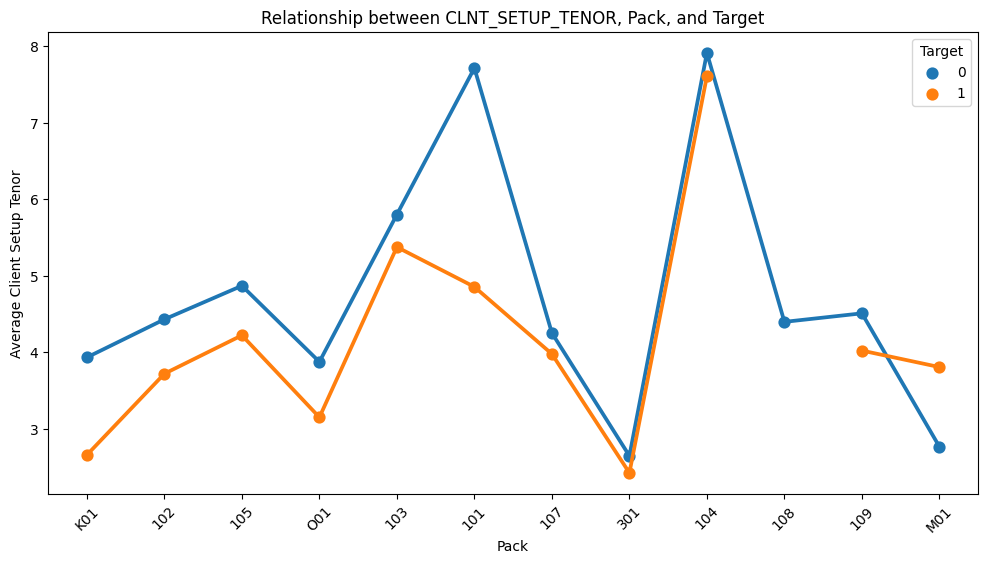

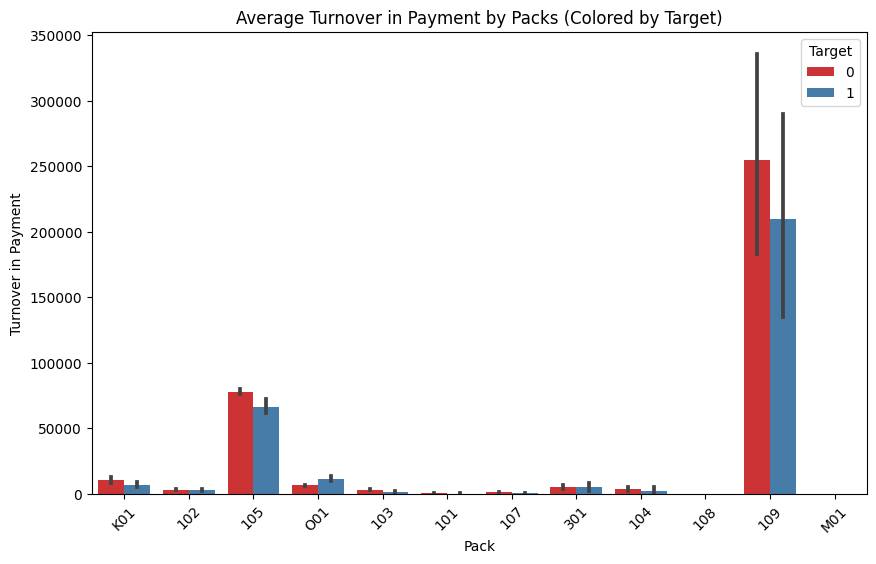

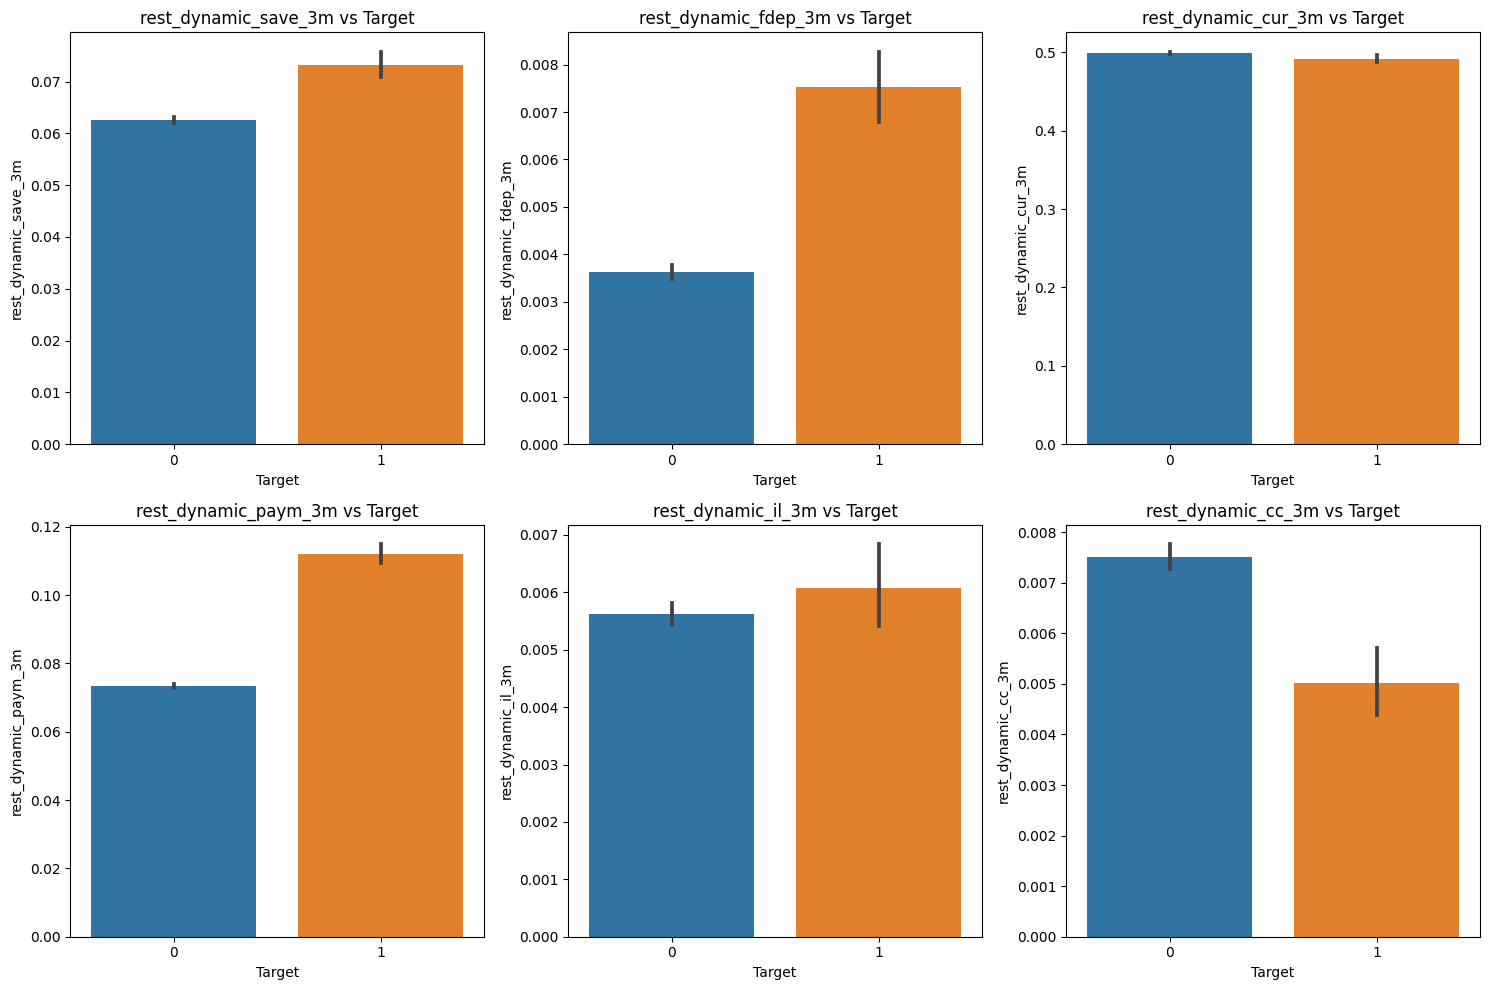

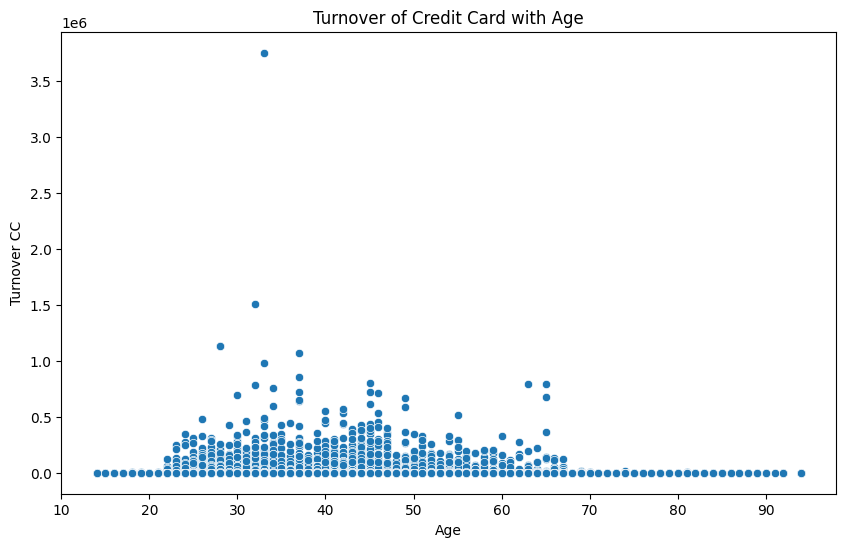

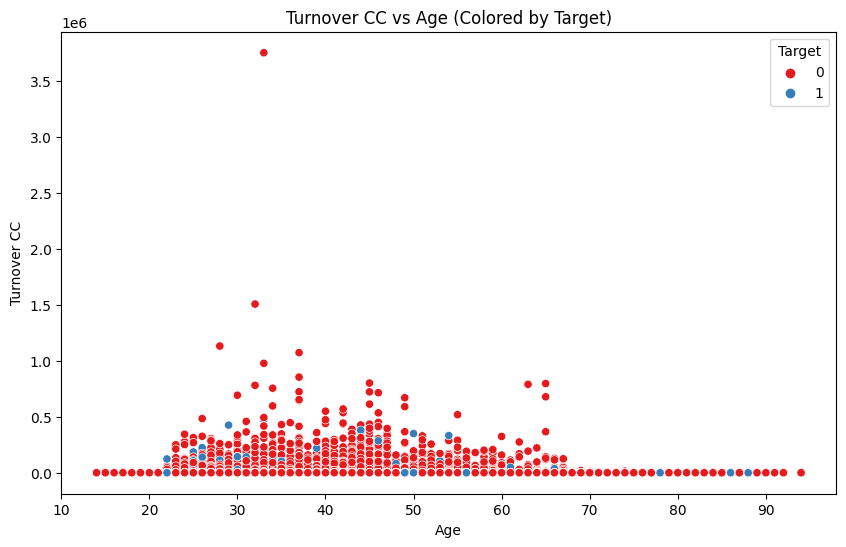

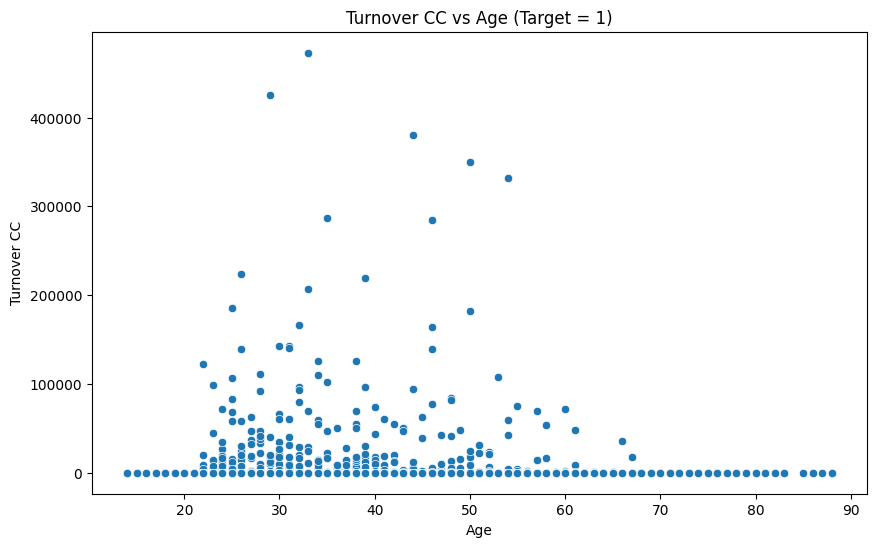

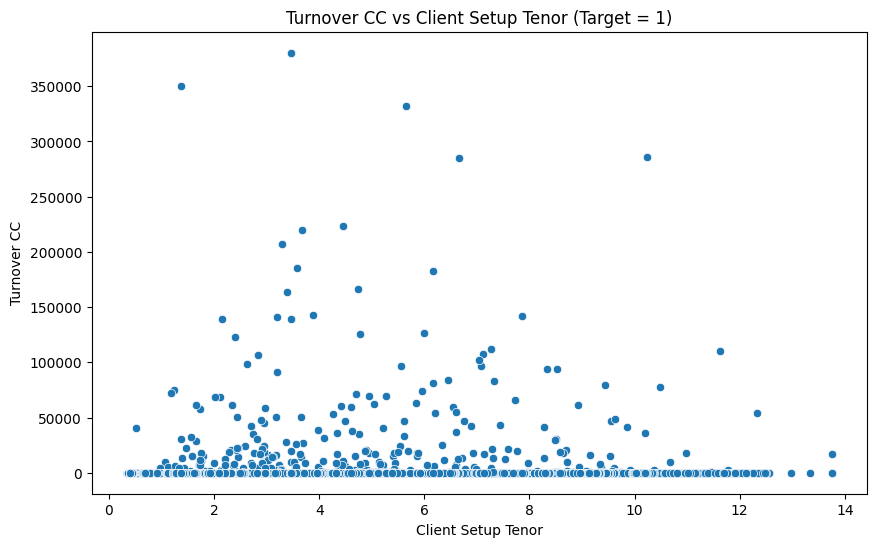

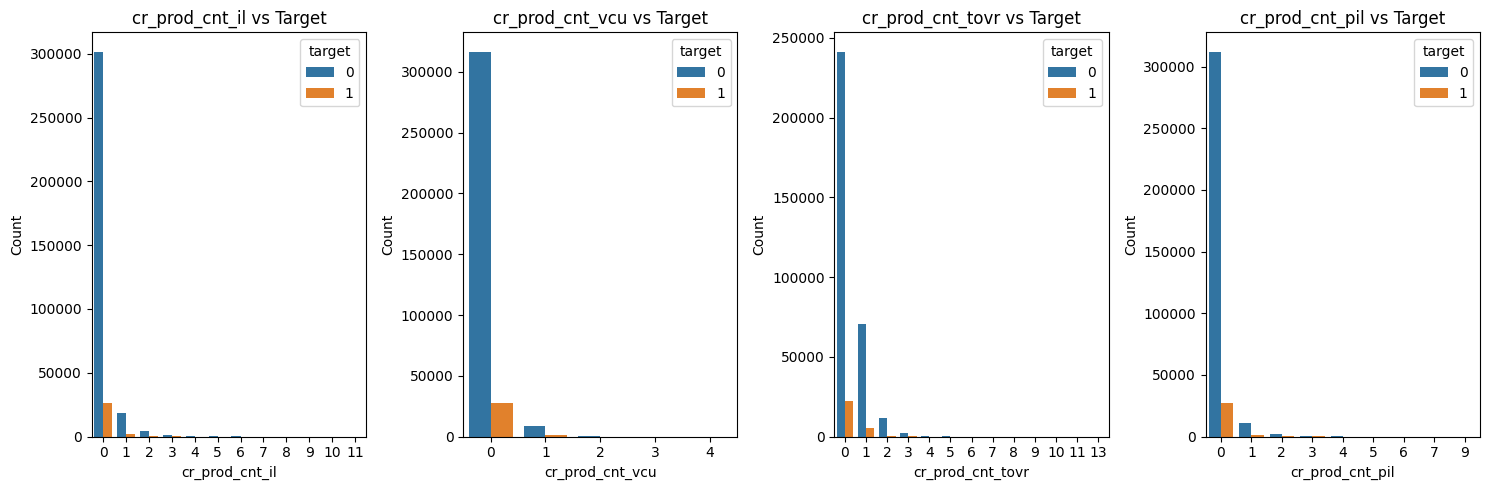

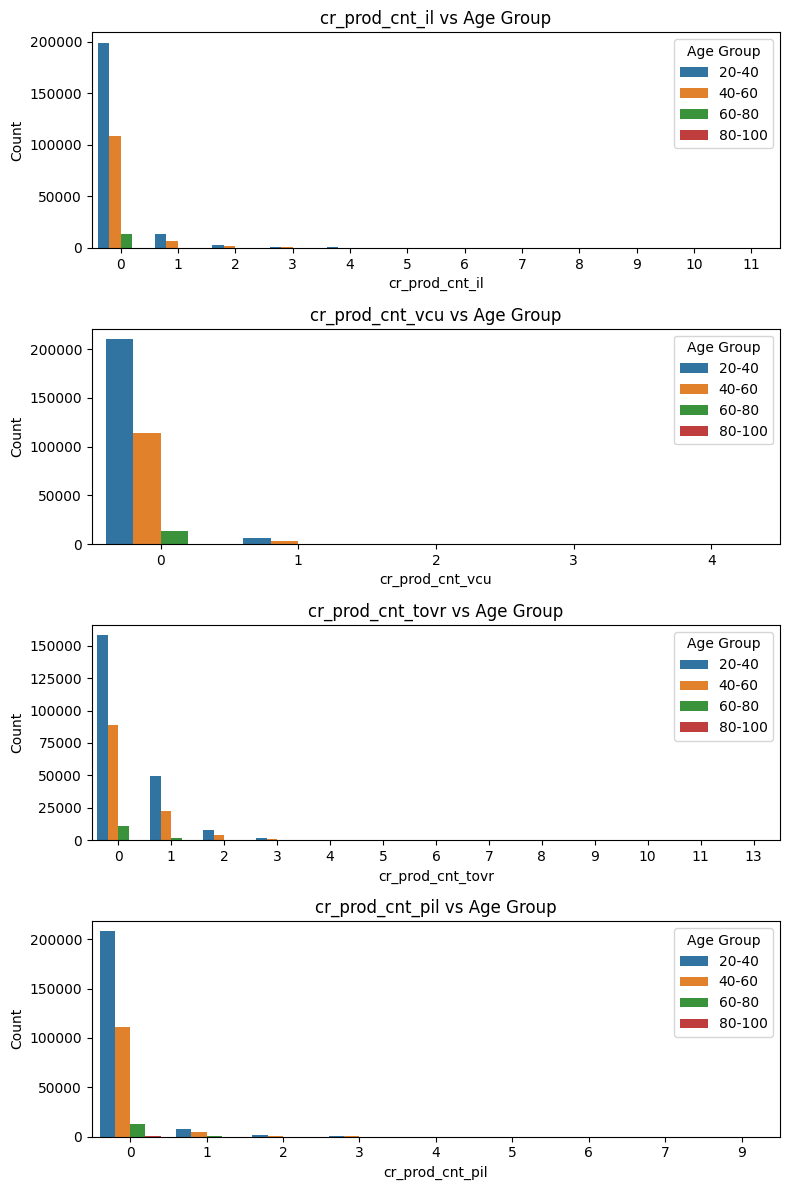

File 'dev/processed/bank_data_visualization.csv' successfully written to bucket 'introtoaiwinter24'.


NameError: name 'pyplot' is not defined

NameError: name 'pyplot' is not defined

In [8]:
# %run data_cleaning.ipynb
# %run data_visualization.ipynb
# %run feature_engineering.ipynb
# %run random_forest.ipynb
